In [1]:
import os
import zipfile
import numpy as np
import cv2
import glob
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

# --- Load and preprocess images ---
def load_images(folder_path, img_size=(64, 64)):
    images, labels = [], []
    for class_folder in tqdm(os.listdir(folder_path), desc="Loading classes"):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for img_file in glob.glob(os.path.join(class_path, "*.*")):
                if img_file.lower().endswith((".png", ".jpg", ".jpeg")):
                    img = cv2.imread(img_file)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    img = img / 255.0
                    images.append(img)
                    labels.append(class_folder)
    return np.array(images), np.array(labels)

# --- Unzip dataset ---
print("Unzipping dataset...")
with zipfile.ZipFile("/content/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("fruit_dataset")

# --- Load training data ---
base_dir = os.path.join("fruit_dataset", "Fruits Classification")
X, y = load_images(os.path.join(base_dir, "train"))

# --- Label encoding ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Flatten and apply PCA ---
X_flat = X.reshape(len(X), -1)
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_flat)

# --- Save PCA and LabelEncoder ---
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# --- Split data ---
X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- MLP model ---
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_pca.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Train model ---
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

print("Training model...")
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

# --- Save trained model ---
model.save("fruit_classifier_model.h5")
print("✅ Model saved as fruit_classifier_model.h5")


Unzipping dataset...


Loading classes: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.2404 - loss: 2.0634 - val_accuracy: 0.3582 - val_loss: 1.4821
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.3555 - loss: 1.6632 - val_accuracy: 0.4077 - val_loss: 1.4002
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.4016 - loss: 1.5236 - val_accuracy: 0.4258 - val_loss: 1.3499
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.4266 - loss: 1.4260 - val_accuracy: 0.4392 - val_loss: 1.3213
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.4574 - loss: 1.3385 - val_accuracy: 0.4443 - val_loss: 1.3035
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.5005 - loss: 1.2682 - val_accuracy: 0.4515 - val_loss: 1.2867
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.5269 - loss: 1.2030 - val_accuracy: 0.4644 - val_loss: 1.2669
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5377 - loss

✅ Model saved as fruit_classifier_model.h5


HTML(value='<h3>Upload a fruit image to classify:</h3>')

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


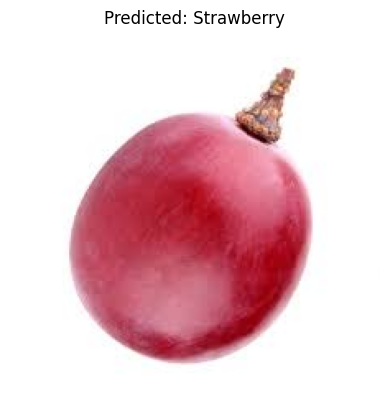

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


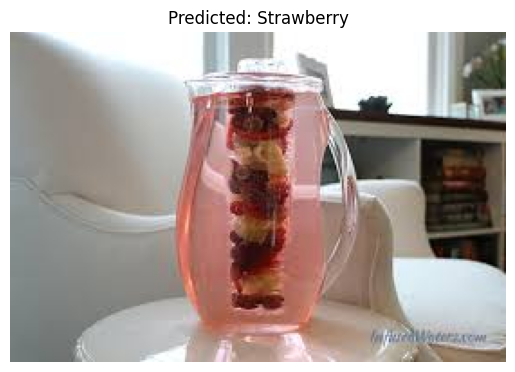

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


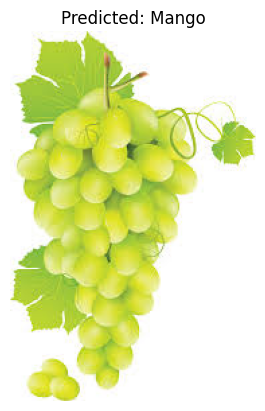

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


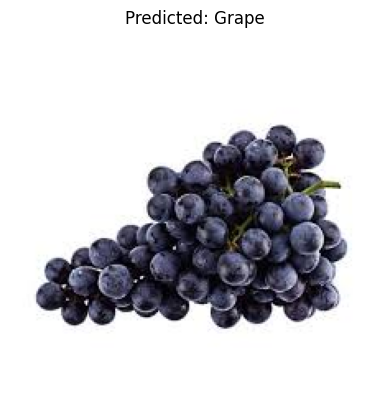

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


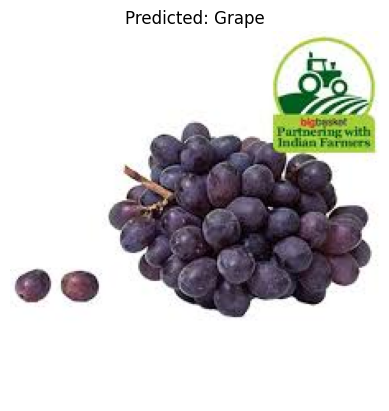

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


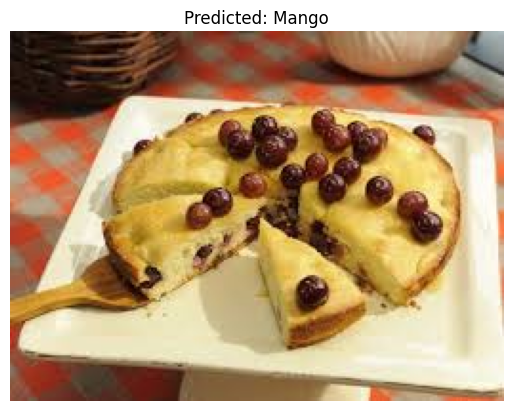

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


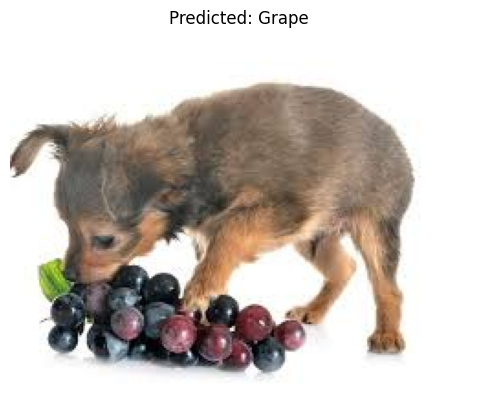

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


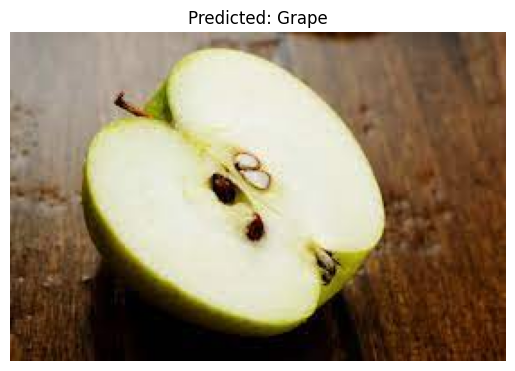

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


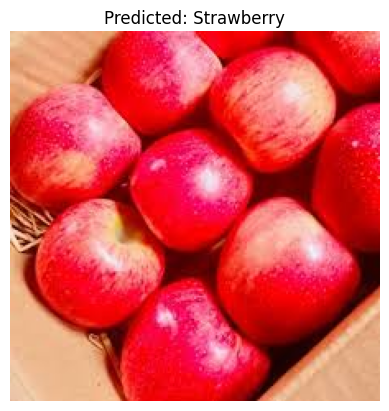

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


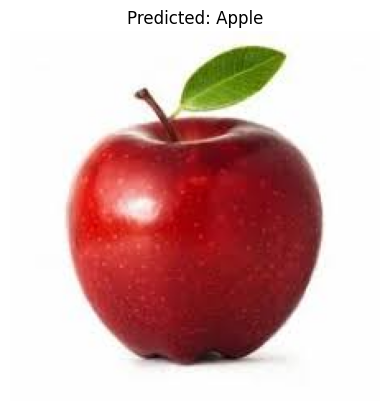

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


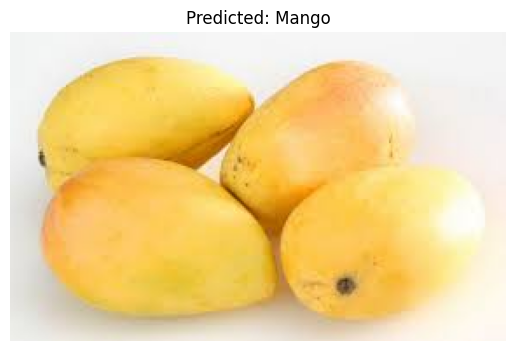

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


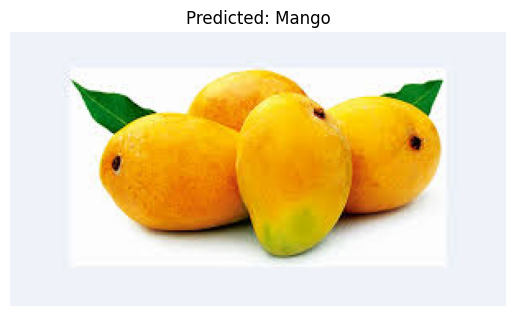

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


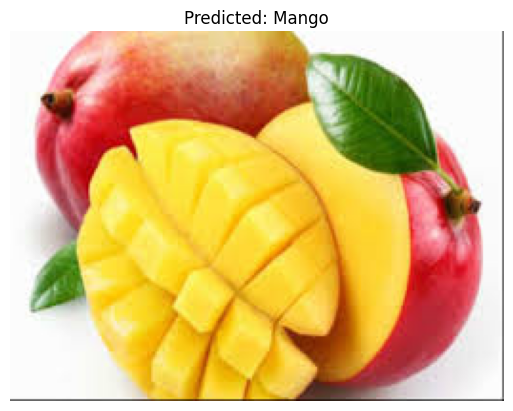

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


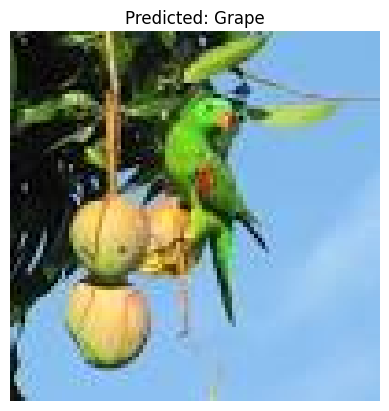

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


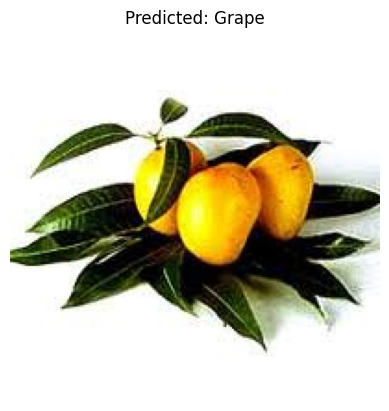

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


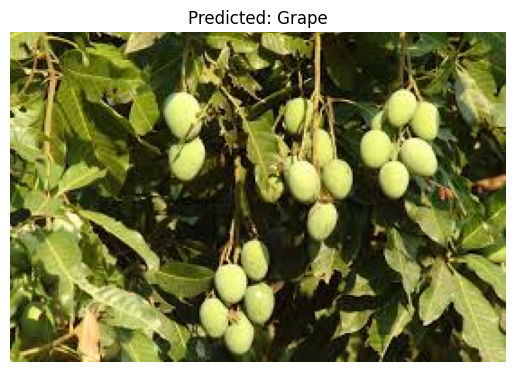

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


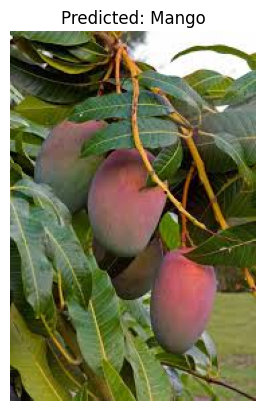

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from tensorflow.keras.models import load_model
import pickle

# --- Load Model and Tools ---
model = load_model("fruit_classifier_model.h5")

with open("pca.pkl", "rb") as f:
    pca = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# --- GUI Upload Widget ---
upload = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload.value:
        content = next(iter(upload.value.values()))
        img_bytes = content['content']
        img_array = np.frombuffer(img_bytes, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, (64, 64)) / 255.0

        # Flatten and transform
        img_flat = img_resized.reshape(1, -1)
        img_pca = pca.transform(img_flat)
        prediction = model.predict(img_pca)
        predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])[0]


        plt.imshow(img_rgb)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()

upload.observe(on_upload_change, names='value')
display(widgets.HTML("<h3>Upload a fruit image to classify:</h3>"))
display(upload)